In [456]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns

In [476]:
train_x = pd.read_csv('X_train.csv')
train_y = pd.read_csv('y_train.csv')
test_x = pd.read_csv('X_test.csv')

In [354]:
train_x.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [355]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 13 columns):
row_id                   487680 non-null object
series_id                487680 non-null int64
measurement_number       487680 non-null int64
orientation_X            487680 non-null float64
orientation_Y            487680 non-null float64
orientation_Z            487680 non-null float64
orientation_W            487680 non-null float64
angular_velocity_X       487680 non-null float64
angular_velocity_Y       487680 non-null float64
angular_velocity_Z       487680 non-null float64
linear_acceleration_X    487680 non-null float64
linear_acceleration_Y    487680 non-null float64
linear_acceleration_Z    487680 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 48.4+ MB


In [393]:
train_x[train_x.columns[3:]].describe()

,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000
mean,-0.018050,0.075062,0.012458,-0.003804,0.000178,0.008338,-0.019184,0.129281,2.886468,-9.364886
std,0.685696,0.708226,0.105972,0.104299,0.117764,0.088677,0.229153,1.870600,2.140067,2.845341
min,-0.989100,-0.989650,-0.162830,-0.156620,-2.371000,-0.927860,-1.268800,-36.067000,-121.490000,-75.386000
25%,-0.705120,-0.688980,-0.089466,-0.106060,-0.040752,-0.033191,-0.090743,-0.530833,1.957900,-10.193000
50%,-0.105960,0.237855,0.031949,-0.018704,0.000084,0.005412,-0.005335,0.124980,2.879600,-9.365300
75%,0.651803,0.809550,0.122870,0.097215,0.040527,0.048068,0.064604,0.792263,3.798800,-8.522700
max,0.989100,0.988980,0.155710,0.154770,2.282200,1.079100,1.387300,36.797000,73.008000,65.839000


In [408]:
train_x.groupby(['series_id'])['measurement_number'].max()

series_id
0       127
1       127
2       127
3       127
4       127
5       127
6       127
7       127
8       127
9       127
10      127
11      127
12      127
13      127
14      127
15      127
16      127
17      127
18      127
19      127
20      127
21      127
22      127
23      127
24      127
25      127
26      127
27      127
28      127
29      127
       ... 
3780    127
3781    127
3782    127
3783    127
3784    127
3785    127
3786    127
3787    127
3788    127
3789    127
3790    127
3791    127
3792    127
3793    127
3794    127
3795    127
3796    127
3797    127
3798    127
3799    127
3800    127
3801    127
3802    127
3803    127
3804    127
3805    127
3806    127
3807    127
3808    127
3809    127
Name: measurement_number, Length: 3810, dtype: int64

Text(0.5,1,'Correlation Heatmap')

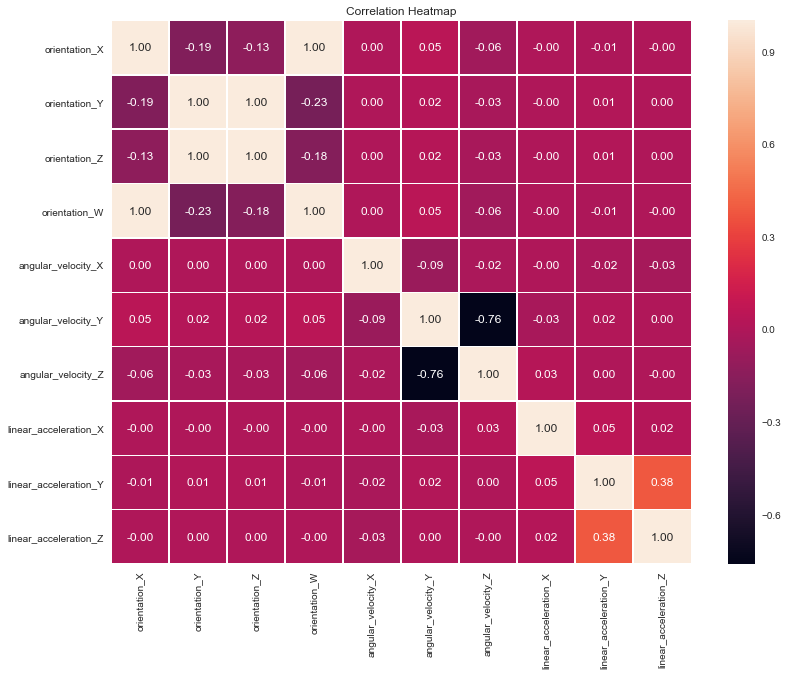

In [410]:
plt.subplots(figsize=(13, 10))
sns.heatmap(train_x[train_x.columns[3:]].corr(), annot=True, linewidths=.5, fmt= '.2f').set_title('Correlation Heatmap')

Number of unique classes:  9
----------------------------------------
concrete                  779
soft_pvc                  732
wood                      607
tiled                     514
fine_concrete             363
hard_tiles_large_space    308
soft_tiles                297
carpet                    189
hard_tiles                 21
Name: surface, dtype: int64
----------------------------------------


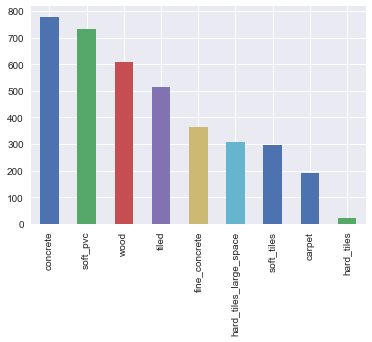

In [415]:
print("Number of unique classes: ",len(train_y.surface.unique()))
print('-'*40)
print(train_y.surface.value_counts())
print('-'*40)
train_y.surface.value_counts().plot.bar()
plt.show()

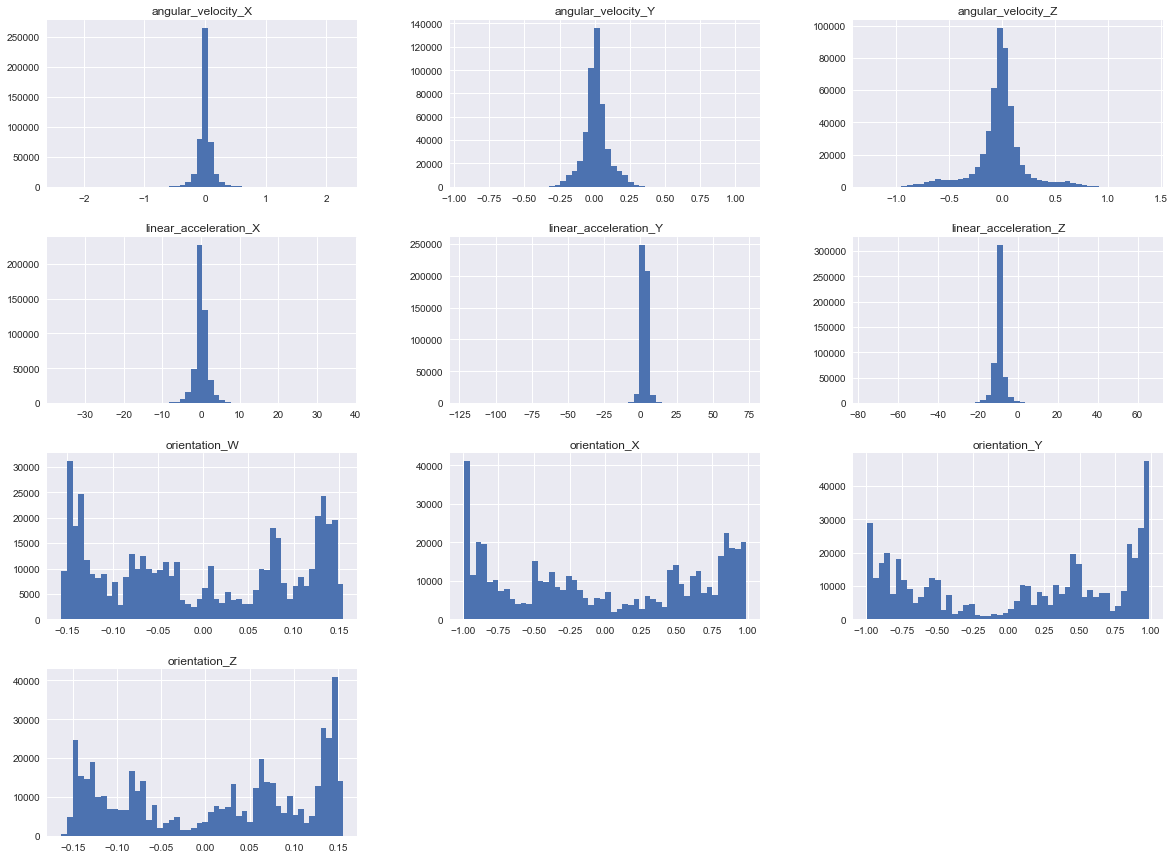

In [389]:
train_x[train_x.columns[3:]].hist(bins=50, figsize=(20,15))
plt.show()

In [477]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_y.surface)

train_y['surface'] = le.transform(train_y.surface)

In [478]:
surface_df = pd.Series(train_y['surface'])

In [479]:
# surface=[]
# groupid=[]
# for ids in train_x.series_id:
#     surface.append(train_y.surface[ids])
#     groupid.append(train_y.group_id[ids])

In [480]:
# train_x['surface'] = surface
# train_x['group_id'] = groupid

In [481]:
def quaternion_to_euler(x, y, z, w):
    import math
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    X = math.degrees(math.atan2(t0, t1))

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    Y = math.degrees(math.asin(t2))

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    Z = math.degrees(math.atan2(t3, t4))

    return X, Y, Z

In [482]:
def euler_trans(setname):
    euler_xyz=[]
    for x,y,z,w in zip(setname.orientation_X,setname.orientation_Y,setname.orientation_Z,setname.orientation_W):
        xyz=[]
        X, Y, Z = quaternion_to_euler(x,y,z,w)
        xyz.append(X)
        xyz.append(Y)
        xyz.append(Z)
        euler_xyz.append(xyz)
    return euler_xyz

In [483]:
train_euler_xyz = euler_trans(train_x)
test_euler_xyz = euler_trans(test_x)

In [484]:
from sklearn.preprocessing import normalize
train_norm_euler = normalize(train_euler_xyz)
test_norm_euler = normalize(test_euler_xyz)

In [485]:
def add_norm_euler(setname, norm_euler):
    euler_X=[]
    euler_Y=[]
    euler_Z=[]
    for x, y, z in norm_euler:
        euler_X.append(format(x,'.6f'))
        euler_Y.append(format(y,'.6f'))
        euler_Z.append(format(z,'.6f'))
    setname['euler_X']=euler_X
    setname['euler_Y']=euler_Y
    setname['euler_Z']=euler_Z

In [486]:
add_norm_euler(train_x, train_norm_euler)
add_norm_euler(test_x, test_norm_euler)

In [487]:
for setname in [train_x,test_x]:
    setname['euler_X']=setname.euler_X.astype('float')
    setname['euler_Y']=setname.euler_Y.astype('float')
    setname['euler_Z']=setname.euler_Z.astype('float')

In [488]:
# def q_variable(setname):
#     cy=[]
#     sy=[]
#     cp=[]
#     sp=[]
#     cr=[]
#     sr=[]
#     for i in range(len(setname)):
#         cy.append(np.cos(setname.euler_Z[i] * 0.5))
#         sy.append(np.sin(setname.euler_Z[i] * 0.5))
#         cp.append(np.cos(setname.euler_Y[i] * 0.5))
#         sp.append(np.sin(setname.euler_Y[i] * 0.5))
#         cr.append(np.cos(setname.euler_X[i] * 0.5))
#         sr.append(np.sin(setname.euler_X[i] * 0.5))
#     setname['cy'] = cy
#     setname['sy'] = sy
#     setname['cp'] = cp
#     setname['sp'] = sp
#     setname['cr'] = cr
#     setname['sr'] = sr

In [489]:
# q_variable(train_x)
# q_variable(test_x)

In [528]:
def morefeature(setname):
    def f1(x):
        return np.mean(np.diff(np.abs(np.diff(x))))
    
    def f2(x):
        return np.mean(np.abs(np.diff(x)))
    setname['total_angular_velocity'] = (setname['angular_velocity_X'] ** 2 + setname['angular_velocity_Y'] ** 2 + setname['angular_velocity_Z'] ** 2) ** 0.5
    setname['total_linear_acceleration'] = (setname['linear_acceleration_X'] ** 2 + setname['linear_acceleration_Y'] ** 2 + setname['linear_acceleration_Z'] ** 2) ** 0.5
    setname['total_orientation'] = (setname['orientation_X']**2 + setname['orientation_Y']**2 + setname['orientation_Z']**2)**0.5
    setname['acc_vs_vel'] = setname['total_linear_acceleration'] / setname['total_angular_velocity']
    setname['total_angle'] = (setname['euler_X'] ** 2 + setname['euler_Y'] ** 2 + setname['euler_Z'] ** 2) ** 5
    setname['angle_vs_acc'] = setname['total_angle'] / setname['total_linear_acceleration']
    setname['total_time'] = setname['total_angle'] / setname['total_angular_velocity']
    setname['total_linear_velocity'] = setname['total_time']*setname['total_linear_acceleration']
#     setname['lin_vel_vs_ang_vel'] = setname['total_linear_velocity']/setname['total_angular_velocity']
#     setname['angle_vs_lin_vel'] = setname['total_angle'] / setname['total_linear_velocity']
#     setname['lin_vel_vs_lin_acc'] = setname['total_linear_velocity']/setname['total_linear_acceleration']
    temp_df = pd.DataFrame()
    for col in setname.columns[3:]:
#         temp_df[col + '_sum'] = setname.groupby(['series_id'])[col].sum()
#         temp_df[col + '_min'] = setname.groupby(['series_id'])[col].min()
#         temp_df[col + '_max'] = setname.groupby(['series_id'])[col].max()
        temp_df[col + '_max_vs_min'] = setname.groupby(['series_id'])[col].max() / setname.groupby(['series_id'])[col].min()
        temp_df[col + '_mean'] = setname.groupby(['series_id'])[col].mean()
        temp_df[col + '_std'] = setname.groupby(['series_id'])[col].std()
        temp_df[col + '_skew'] = setname.groupby(['series_id'])[col].skew()
        temp_df[col + '_kurt'] = setname.groupby(['series_id'])[col].apply(pd.DataFrame.kurt)
        temp_df[col + '_med'] = setname.groupby(['series_id'])[col].median()
        temp_df[col + '_q1'] = setname.groupby(['series_id'])[col].quantile(0.25)
        temp_df[col + '_q2'] = setname.groupby(['series_id'])[col].quantile(0.5)
        temp_df[col + '_q3'] = setname.groupby(['series_id'])[col].quantile(0.75)
        temp_df[col + '_mean_abs_change'] = setname.groupby('series_id')[col].apply(f2)
        temp_df[col + '_mean_change_of_abs_change'] = setname.groupby('series_id')[col].apply(f1)
        temp_df[col + '_abs_max'] = setname.groupby('series_id')[col].apply(lambda x: np.max(np.abs(x)))
        temp_df[col + '_abs_min'] = setname.groupby('series_id')[col].apply(lambda x: np.min(np.abs(x)))
        temp_df[col + '_abs_avg'] = (temp_df[col + '_abs_min'] + temp_df[col + '_abs_max'])/2
    return temp_df

In [529]:
%%time
new_train_x = morefeature(train_x)
new_test_x = morefeature(test_x)

Wall time: 4min 17s


In [319]:
new_test_x[new_test_x.isnull().any(axis=1)]

,orientation_X_sum,orientation_X_min,orientation_X_max,orientation_X_max_vs_min,orientation_X_mean,orientation_X_std,orientation_X_skew,orientation_X_kurt,orientation_X_med,orientation_X_q1,...,total_orientation_skew,total_orientation_kurt,total_orientation_med,total_orientation_q1,total_orientation_q2,total_orientation_q3,total_orientation_mean_abs_change,total_orientation_mean_change_of_abs_change,total_orientation_abs_max,total_orientation_abs_min
series_id,,,,,,,,,,,,,,,,,,,,,


In [320]:
new_train_x[new_train_x.isnull().any(axis=1)]

,orientation_X_sum,orientation_X_min,orientation_X_max,orientation_X_max_vs_min,orientation_X_mean,orientation_X_std,orientation_X_skew,orientation_X_kurt,orientation_X_med,orientation_X_q1,...,total_orientation_skew,total_orientation_kurt,total_orientation_med,total_orientation_q1,total_orientation_q2,total_orientation_q3,total_orientation_mean_abs_change,total_orientation_mean_change_of_abs_change,total_orientation_abs_max,total_orientation_abs_min
series_id,,,,,,,,,,,,,,,,,,,,,


In [298]:
print(len(new_train_x), len(new_test_x))

3810 3816


In [18]:
import pickle

f = open('new_train_df.pkl', 'wb')
pickle.dump(new_train_x,f)

f = open('new_test_x.pkl', 'wb')
pickle.dump(new_test_x,f)

In [155]:
# lg = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, 
#                                    n_estimators=800, subsample_for_bin=200000, objective='multiclass',
#                                    sub_feature=0.1, min_data=20,
#                                    random_state=42, n_jobs=-1
#                        )

In [174]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'num_leaves':[31], 'n_estimators':[700], 'subsample_for_bin':[60000, 70000, 80000],
#               'min_data':[10], 'max_depth':[-1], 'boosting_type':['gbdt'], 'objective':['multiclass']
#              }

# gridlgb = GridSearchCV(lg, parameters, cv=5, verbose=5, n_jobs=-1)

In [175]:
# gridlgb.fit(new_train_x, surface_df)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  1.1min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.1min remaining:   59.9s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  2.1min remaining:   31.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_data=20,
        min_split_gain=0.0, n_estimators=800, n_jobs=-1, num_leaves=31,
        objective='multiclass', random_state=42, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, sub_feature=0.1, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'num_leaves': [31], 'n_estimators': [700], 'subsample_for_bin': [80000, 90000, 100000], 'min_data': [10], 'max_depth': [-1], 'boosting_type': ['gbdt'], 'objective': ['multiclass']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [176]:
# print(gridlgb.best_params_, gridlgb.best_score_)

{'boosting_type': 'gbdt', 'max_depth': -1, 'min_data': 10, 'n_estimators': 700, 'num_leaves': 31, 'objective': 'multiclass', 'subsample_for_bin': 80000} 0.8871391076115486


In [242]:
# from sklearn.model_selection import StratifiedKFold

# stfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

[1]	valid_0's multi_logloss: 1.7825
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's multi_logloss: 1.62351
[3]	valid_0's multi_logloss: 1.49623
[4]	valid_0's multi_logloss: 1.38378
[5]	valid_0's multi_logloss: 1.28906
[6]	valid_0's multi_logloss: 1.20731
[7]	valid_0's multi_logloss: 1.13432
[8]	valid_0's multi_logloss: 1.07243
[9]	valid_0's multi_logloss: 1.01425
[10]	valid_0's multi_logloss: 0.962399
[11]	valid_0's multi_logloss: 0.91629
[12]	valid_0's multi_logloss: 0.875596
[13]	valid_0's multi_logloss: 0.840127
[14]	valid_0's multi_logloss: 0.805535
[15]	valid_0's multi_logloss: 0.769784
[16]	valid_0's multi_logloss: 0.738867
[17]	valid_0's multi_logloss: 0.714247
[18]	valid_0's multi_logloss: 0.688706
[19]	valid_0's multi_logloss: 0.66507
[20]	valid_0's multi_logloss: 0.643663
[21]	valid_0's multi_logloss: 0.621952
[22]	valid_0's multi_logloss: 0.602767
[23]	valid_0's multi_logloss: 0.584235
[24]	valid_0's multi_logloss: 0.569244
[25]	valid_0's multi_l

[213]	valid_0's multi_logloss: 0.322773
[214]	valid_0's multi_logloss: 0.32293
[215]	valid_0's multi_logloss: 0.322522
[216]	valid_0's multi_logloss: 0.323294
[217]	valid_0's multi_logloss: 0.323839
[218]	valid_0's multi_logloss: 0.323769
[219]	valid_0's multi_logloss: 0.3244
[220]	valid_0's multi_logloss: 0.324474
[221]	valid_0's multi_logloss: 0.32404
[222]	valid_0's multi_logloss: 0.323646
[223]	valid_0's multi_logloss: 0.323947
[224]	valid_0's multi_logloss: 0.323893
[225]	valid_0's multi_logloss: 0.324434
[226]	valid_0's multi_logloss: 0.324655
[227]	valid_0's multi_logloss: 0.325143
[228]	valid_0's multi_logloss: 0.32509
[229]	valid_0's multi_logloss: 0.325467
[230]	valid_0's multi_logloss: 0.326034
[231]	valid_0's multi_logloss: 0.32666
[232]	valid_0's multi_logloss: 0.326866
[233]	valid_0's multi_logloss: 0.326761
[234]	valid_0's multi_logloss: 0.326892
[235]	valid_0's multi_logloss: 0.327216
[236]	valid_0's multi_logloss: 0.327298
[237]	valid_0's multi_logloss: 0.327049
[238]	

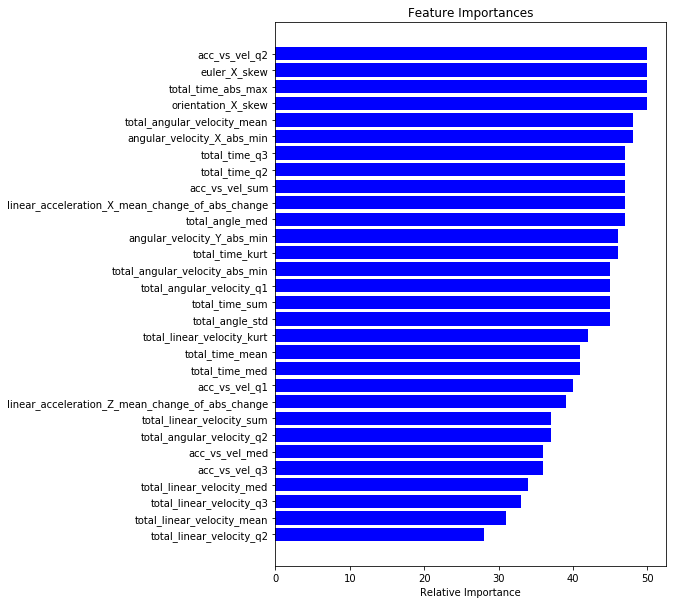

[1]	valid_0's multi_logloss: 1.78248
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's multi_logloss: 1.63745
[3]	valid_0's multi_logloss: 1.51189
[4]	valid_0's multi_logloss: 1.40555
[5]	valid_0's multi_logloss: 1.31933
[6]	valid_0's multi_logloss: 1.23921
[7]	valid_0's multi_logloss: 1.16736
[8]	valid_0's multi_logloss: 1.10028
[9]	valid_0's multi_logloss: 1.0433
[10]	valid_0's multi_logloss: 0.994169
[11]	valid_0's multi_logloss: 0.946414
[12]	valid_0's multi_logloss: 0.901868
[13]	valid_0's multi_logloss: 0.861969
[14]	valid_0's multi_logloss: 0.824151
[15]	valid_0's multi_logloss: 0.790551
[16]	valid_0's multi_logloss: 0.75998
[17]	valid_0's multi_logloss: 0.733407
[18]	valid_0's multi_logloss: 0.706843
[19]	valid_0's multi_logloss: 0.682361
[20]	valid_0's multi_logloss: 0.661533
[21]	valid_0's multi_logloss: 0.640437
[22]	valid_0's multi_logloss: 0.620275
[23]	valid_0's multi_logloss: 0.603427
[24]	valid_0's multi_logloss: 0.586714
[25]	valid_0's multi_

[216]	valid_0's multi_logloss: 0.275211
[217]	valid_0's multi_logloss: 0.275897
[218]	valid_0's multi_logloss: 0.276168
[219]	valid_0's multi_logloss: 0.276145
[220]	valid_0's multi_logloss: 0.276031
[221]	valid_0's multi_logloss: 0.276792
[222]	valid_0's multi_logloss: 0.27692
[223]	valid_0's multi_logloss: 0.277516
[224]	valid_0's multi_logloss: 0.277888
[225]	valid_0's multi_logloss: 0.277828
[226]	valid_0's multi_logloss: 0.278112
[227]	valid_0's multi_logloss: 0.277746
[228]	valid_0's multi_logloss: 0.278244
[229]	valid_0's multi_logloss: 0.278046
[230]	valid_0's multi_logloss: 0.278991
[231]	valid_0's multi_logloss: 0.278422
[232]	valid_0's multi_logloss: 0.278182
[233]	valid_0's multi_logloss: 0.278348
[234]	valid_0's multi_logloss: 0.278456
[235]	valid_0's multi_logloss: 0.278657
[236]	valid_0's multi_logloss: 0.27897
[237]	valid_0's multi_logloss: 0.278951
[238]	valid_0's multi_logloss: 0.278924
[239]	valid_0's multi_logloss: 0.278994
[240]	valid_0's multi_logloss: 0.279381
[2

[86]	valid_0's multi_logloss: 0.237609
[87]	valid_0's multi_logloss: 0.237082
[88]	valid_0's multi_logloss: 0.23684
[89]	valid_0's multi_logloss: 0.235043
[90]	valid_0's multi_logloss: 0.234577
[91]	valid_0's multi_logloss: 0.23322
[92]	valid_0's multi_logloss: 0.233621
[93]	valid_0's multi_logloss: 0.233174
[94]	valid_0's multi_logloss: 0.232208
[95]	valid_0's multi_logloss: 0.232016
[96]	valid_0's multi_logloss: 0.231536
[97]	valid_0's multi_logloss: 0.230614
[98]	valid_0's multi_logloss: 0.229586
[99]	valid_0's multi_logloss: 0.229429
[100]	valid_0's multi_logloss: 0.228903
[101]	valid_0's multi_logloss: 0.228035
[102]	valid_0's multi_logloss: 0.227612
[103]	valid_0's multi_logloss: 0.227405
[104]	valid_0's multi_logloss: 0.227707
[105]	valid_0's multi_logloss: 0.226958
[106]	valid_0's multi_logloss: 0.226589
[107]	valid_0's multi_logloss: 0.226023
[108]	valid_0's multi_logloss: 0.225037
[109]	valid_0's multi_logloss: 0.224092
[110]	valid_0's multi_logloss: 0.22456
[111]	valid_0's m

[307]	valid_0's multi_logloss: 0.249524
[308]	valid_0's multi_logloss: 0.249601
[309]	valid_0's multi_logloss: 0.24954
[310]	valid_0's multi_logloss: 0.249812
[311]	valid_0's multi_logloss: 0.249848
[312]	valid_0's multi_logloss: 0.250179
[313]	valid_0's multi_logloss: 0.250337
[314]	valid_0's multi_logloss: 0.250161
[315]	valid_0's multi_logloss: 0.250235
[316]	valid_0's multi_logloss: 0.250193
[317]	valid_0's multi_logloss: 0.250174
[318]	valid_0's multi_logloss: 0.250305
[319]	valid_0's multi_logloss: 0.250338
[320]	valid_0's multi_logloss: 0.250399
[321]	valid_0's multi_logloss: 0.250486
[322]	valid_0's multi_logloss: 0.250243
[323]	valid_0's multi_logloss: 0.250728
[324]	valid_0's multi_logloss: 0.250768
[325]	valid_0's multi_logloss: 0.250933
[326]	valid_0's multi_logloss: 0.250759
[327]	valid_0's multi_logloss: 0.251204
[328]	valid_0's multi_logloss: 0.251298
[329]	valid_0's multi_logloss: 0.251241
[330]	valid_0's multi_logloss: 0.25122
[331]	valid_0's multi_logloss: 0.251213
[3

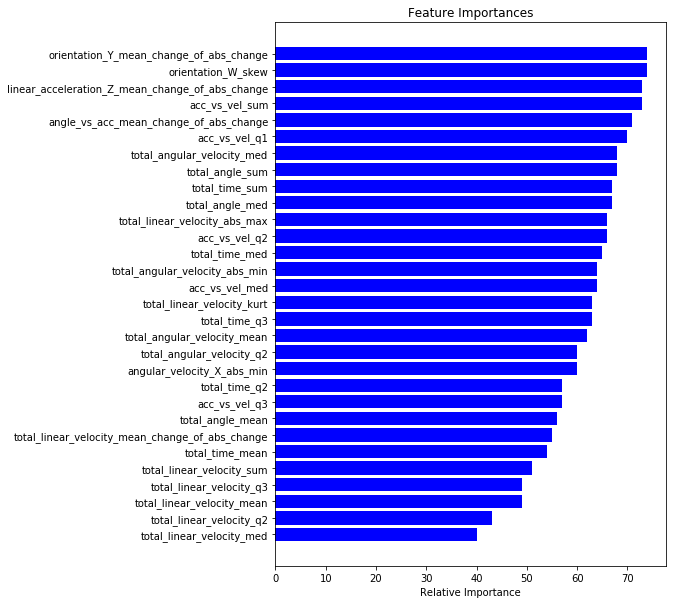

[1]	valid_0's multi_logloss: 1.78702
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's multi_logloss: 1.63442
[3]	valid_0's multi_logloss: 1.50698
[4]	valid_0's multi_logloss: 1.39988
[5]	valid_0's multi_logloss: 1.31018
[6]	valid_0's multi_logloss: 1.23281
[7]	valid_0's multi_logloss: 1.15771
[8]	valid_0's multi_logloss: 1.09121
[9]	valid_0's multi_logloss: 1.03074
[10]	valid_0's multi_logloss: 0.976123
[11]	valid_0's multi_logloss: 0.927367
[12]	valid_0's multi_logloss: 0.881963
[13]	valid_0's multi_logloss: 0.840665
[14]	valid_0's multi_logloss: 0.80327
[15]	valid_0's multi_logloss: 0.768048
[16]	valid_0's multi_logloss: 0.736285
[17]	valid_0's multi_logloss: 0.708828
[18]	valid_0's multi_logloss: 0.683032
[19]	valid_0's multi_logloss: 0.656825
[20]	valid_0's multi_logloss: 0.629986
[21]	valid_0's multi_logloss: 0.608759
[22]	valid_0's multi_logloss: 0.58854
[23]	valid_0's multi_logloss: 0.5719
[24]	valid_0's multi_logloss: 0.551434
[25]	valid_0's multi_lo

[218]	valid_0's multi_logloss: 0.194262
[219]	valid_0's multi_logloss: 0.193901
[220]	valid_0's multi_logloss: 0.193833
[221]	valid_0's multi_logloss: 0.193399
[222]	valid_0's multi_logloss: 0.193373
[223]	valid_0's multi_logloss: 0.193911
[224]	valid_0's multi_logloss: 0.193934
[225]	valid_0's multi_logloss: 0.194176
[226]	valid_0's multi_logloss: 0.194756
[227]	valid_0's multi_logloss: 0.194612
[228]	valid_0's multi_logloss: 0.194347
[229]	valid_0's multi_logloss: 0.194867
[230]	valid_0's multi_logloss: 0.195126
[231]	valid_0's multi_logloss: 0.195326
[232]	valid_0's multi_logloss: 0.195102
[233]	valid_0's multi_logloss: 0.194282
[234]	valid_0's multi_logloss: 0.194313
[235]	valid_0's multi_logloss: 0.194722
[236]	valid_0's multi_logloss: 0.195164
[237]	valid_0's multi_logloss: 0.195051
[238]	valid_0's multi_logloss: 0.195926
[239]	valid_0's multi_logloss: 0.196015
[240]	valid_0's multi_logloss: 0.196054
[241]	valid_0's multi_logloss: 0.196402
[242]	valid_0's multi_logloss: 0.196519


[50]	valid_0's multi_logloss: 0.333663
[51]	valid_0's multi_logloss: 0.329736
[52]	valid_0's multi_logloss: 0.326718
[53]	valid_0's multi_logloss: 0.323888
[54]	valid_0's multi_logloss: 0.321443
[55]	valid_0's multi_logloss: 0.317676
[56]	valid_0's multi_logloss: 0.315319
[57]	valid_0's multi_logloss: 0.312039
[58]	valid_0's multi_logloss: 0.309853
[59]	valid_0's multi_logloss: 0.308012
[60]	valid_0's multi_logloss: 0.306447
[61]	valid_0's multi_logloss: 0.304073
[62]	valid_0's multi_logloss: 0.301933
[63]	valid_0's multi_logloss: 0.300732
[64]	valid_0's multi_logloss: 0.298601
[65]	valid_0's multi_logloss: 0.296647
[66]	valid_0's multi_logloss: 0.294532
[67]	valid_0's multi_logloss: 0.293046
[68]	valid_0's multi_logloss: 0.292099
[69]	valid_0's multi_logloss: 0.290301
[70]	valid_0's multi_logloss: 0.288963
[71]	valid_0's multi_logloss: 0.286842
[72]	valid_0's multi_logloss: 0.286625
[73]	valid_0's multi_logloss: 0.285551
[74]	valid_0's multi_logloss: 0.284752
[75]	valid_0's multi_logl

[258]	valid_0's multi_logloss: 0.294337
[259]	valid_0's multi_logloss: 0.294773
[260]	valid_0's multi_logloss: 0.295302
[261]	valid_0's multi_logloss: 0.295639
[262]	valid_0's multi_logloss: 0.295983
[263]	valid_0's multi_logloss: 0.296617
[264]	valid_0's multi_logloss: 0.296863
[265]	valid_0's multi_logloss: 0.297026
[266]	valid_0's multi_logloss: 0.297723
[267]	valid_0's multi_logloss: 0.297775
[268]	valid_0's multi_logloss: 0.297857
[269]	valid_0's multi_logloss: 0.298016
[270]	valid_0's multi_logloss: 0.298755
[271]	valid_0's multi_logloss: 0.29865
[272]	valid_0's multi_logloss: 0.298684
[273]	valid_0's multi_logloss: 0.298589
[274]	valid_0's multi_logloss: 0.299044
[275]	valid_0's multi_logloss: 0.298953
[276]	valid_0's multi_logloss: 0.29922
[277]	valid_0's multi_logloss: 0.299256
[278]	valid_0's multi_logloss: 0.299494
[279]	valid_0's multi_logloss: 0.299666
[280]	valid_0's multi_logloss: 0.299827
[281]	valid_0's multi_logloss: 0.300219
[282]	valid_0's multi_logloss: 0.300113
[2

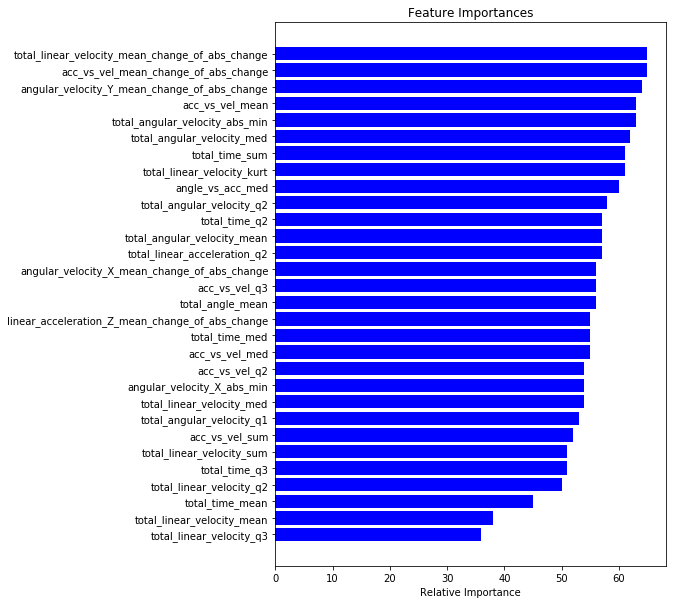

[1]	valid_0's multi_logloss: 1.76786
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's multi_logloss: 1.60634
[3]	valid_0's multi_logloss: 1.47821
[4]	valid_0's multi_logloss: 1.3676
[5]	valid_0's multi_logloss: 1.27629
[6]	valid_0's multi_logloss: 1.19294
[7]	valid_0's multi_logloss: 1.1186
[8]	valid_0's multi_logloss: 1.05393
[9]	valid_0's multi_logloss: 0.993074
[10]	valid_0's multi_logloss: 0.94351
[11]	valid_0's multi_logloss: 0.895051
[12]	valid_0's multi_logloss: 0.854912
[13]	valid_0's multi_logloss: 0.814913
[14]	valid_0's multi_logloss: 0.778953
[15]	valid_0's multi_logloss: 0.746551
[16]	valid_0's multi_logloss: 0.715245
[17]	valid_0's multi_logloss: 0.687977
[18]	valid_0's multi_logloss: 0.66242
[19]	valid_0's multi_logloss: 0.637527
[20]	valid_0's multi_logloss: 0.614393
[21]	valid_0's multi_logloss: 0.593555
[22]	valid_0's multi_logloss: 0.57352
[23]	valid_0's multi_logloss: 0.556105
[24]	valid_0's multi_logloss: 0.53872
[25]	valid_0's multi_log

[220]	valid_0's multi_logloss: 0.236734
[221]	valid_0's multi_logloss: 0.237655
[222]	valid_0's multi_logloss: 0.237766
[223]	valid_0's multi_logloss: 0.238055
[224]	valid_0's multi_logloss: 0.238014
[225]	valid_0's multi_logloss: 0.238275
[226]	valid_0's multi_logloss: 0.238583
[227]	valid_0's multi_logloss: 0.238642
[228]	valid_0's multi_logloss: 0.238844
[229]	valid_0's multi_logloss: 0.238857
[230]	valid_0's multi_logloss: 0.239262
[231]	valid_0's multi_logloss: 0.239899
[232]	valid_0's multi_logloss: 0.23998
[233]	valid_0's multi_logloss: 0.239587
[234]	valid_0's multi_logloss: 0.240303
[235]	valid_0's multi_logloss: 0.240873
[236]	valid_0's multi_logloss: 0.24146
[237]	valid_0's multi_logloss: 0.24181
[238]	valid_0's multi_logloss: 0.241201
[239]	valid_0's multi_logloss: 0.241659
[240]	valid_0's multi_logloss: 0.242697
[241]	valid_0's multi_logloss: 0.243039
[242]	valid_0's multi_logloss: 0.242882
[243]	valid_0's multi_logloss: 0.243197
[244]	valid_0's multi_logloss: 0.243097
[24

[83]	valid_0's multi_logloss: 0.237709
[84]	valid_0's multi_logloss: 0.238135
[85]	valid_0's multi_logloss: 0.237692
[86]	valid_0's multi_logloss: 0.236785
[87]	valid_0's multi_logloss: 0.236872
[88]	valid_0's multi_logloss: 0.236032
[89]	valid_0's multi_logloss: 0.234939
[90]	valid_0's multi_logloss: 0.233996
[91]	valid_0's multi_logloss: 0.233144
[92]	valid_0's multi_logloss: 0.232493
[93]	valid_0's multi_logloss: 0.232921
[94]	valid_0's multi_logloss: 0.231975
[95]	valid_0's multi_logloss: 0.231692
[96]	valid_0's multi_logloss: 0.231677
[97]	valid_0's multi_logloss: 0.230285
[98]	valid_0's multi_logloss: 0.230629
[99]	valid_0's multi_logloss: 0.229573
[100]	valid_0's multi_logloss: 0.229544
[101]	valid_0's multi_logloss: 0.229155
[102]	valid_0's multi_logloss: 0.228236
[103]	valid_0's multi_logloss: 0.228028
[104]	valid_0's multi_logloss: 0.227604
[105]	valid_0's multi_logloss: 0.227522
[106]	valid_0's multi_logloss: 0.227161
[107]	valid_0's multi_logloss: 0.227437
[108]	valid_0's m

[298]	valid_0's multi_logloss: 0.248608
[299]	valid_0's multi_logloss: 0.248805
[300]	valid_0's multi_logloss: 0.248953
[301]	valid_0's multi_logloss: 0.249233
[302]	valid_0's multi_logloss: 0.249123
[303]	valid_0's multi_logloss: 0.249201
[304]	valid_0's multi_logloss: 0.249288
[305]	valid_0's multi_logloss: 0.248934
[306]	valid_0's multi_logloss: 0.248819
[307]	valid_0's multi_logloss: 0.248679
[308]	valid_0's multi_logloss: 0.248704
[309]	valid_0's multi_logloss: 0.248896
[310]	valid_0's multi_logloss: 0.249042
[311]	valid_0's multi_logloss: 0.249108
[312]	valid_0's multi_logloss: 0.249354
[313]	valid_0's multi_logloss: 0.249852
[314]	valid_0's multi_logloss: 0.250196
[315]	valid_0's multi_logloss: 0.250524
[316]	valid_0's multi_logloss: 0.250929
[317]	valid_0's multi_logloss: 0.250647
[318]	valid_0's multi_logloss: 0.250648
[319]	valid_0's multi_logloss: 0.250955
[320]	valid_0's multi_logloss: 0.251112
[321]	valid_0's multi_logloss: 0.251286
[322]	valid_0's multi_logloss: 0.251277


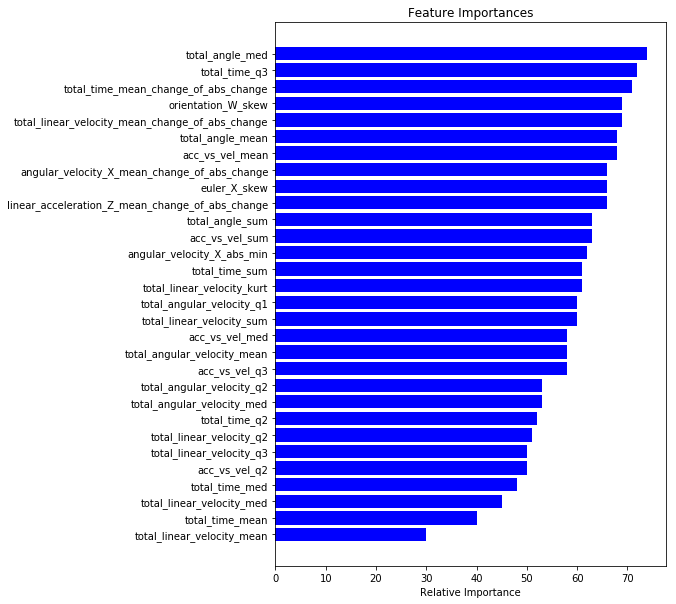

[1]	valid_0's multi_logloss: 1.771
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's multi_logloss: 1.6014
[3]	valid_0's multi_logloss: 1.47526
[4]	valid_0's multi_logloss: 1.36429
[5]	valid_0's multi_logloss: 1.27345
[6]	valid_0's multi_logloss: 1.19627
[7]	valid_0's multi_logloss: 1.1272
[8]	valid_0's multi_logloss: 1.06034
[9]	valid_0's multi_logloss: 1.00525
[10]	valid_0's multi_logloss: 0.950247
[11]	valid_0's multi_logloss: 0.901232
[12]	valid_0's multi_logloss: 0.859586
[13]	valid_0's multi_logloss: 0.816057
[14]	valid_0's multi_logloss: 0.77854
[15]	valid_0's multi_logloss: 0.743641
[16]	valid_0's multi_logloss: 0.710624
[17]	valid_0's multi_logloss: 0.681525
[18]	valid_0's multi_logloss: 0.656194
[19]	valid_0's multi_logloss: 0.631125
[20]	valid_0's multi_logloss: 0.607695
[21]	valid_0's multi_logloss: 0.586686
[22]	valid_0's multi_logloss: 0.565596
[23]	valid_0's multi_logloss: 0.548119
[24]	valid_0's multi_logloss: 0.529691
[25]	valid_0's multi_log

[220]	valid_0's multi_logloss: 0.215094
[221]	valid_0's multi_logloss: 0.215812
[222]	valid_0's multi_logloss: 0.21581
[223]	valid_0's multi_logloss: 0.216137
[224]	valid_0's multi_logloss: 0.215912
[225]	valid_0's multi_logloss: 0.216469
[226]	valid_0's multi_logloss: 0.216934
[227]	valid_0's multi_logloss: 0.216818
[228]	valid_0's multi_logloss: 0.216875
[229]	valid_0's multi_logloss: 0.217186
[230]	valid_0's multi_logloss: 0.21669
[231]	valid_0's multi_logloss: 0.216866
[232]	valid_0's multi_logloss: 0.217067
[233]	valid_0's multi_logloss: 0.217727
[234]	valid_0's multi_logloss: 0.218033
[235]	valid_0's multi_logloss: 0.218655
[236]	valid_0's multi_logloss: 0.218695
[237]	valid_0's multi_logloss: 0.219032
[238]	valid_0's multi_logloss: 0.219041
[239]	valid_0's multi_logloss: 0.219042
[240]	valid_0's multi_logloss: 0.218829
[241]	valid_0's multi_logloss: 0.218972
[242]	valid_0's multi_logloss: 0.219211
[243]	valid_0's multi_logloss: 0.219475
[244]	valid_0's multi_logloss: 0.219643
[2

[83]	valid_0's multi_logloss: 0.268781
[84]	valid_0's multi_logloss: 0.26849
[85]	valid_0's multi_logloss: 0.267825
[86]	valid_0's multi_logloss: 0.267451
[87]	valid_0's multi_logloss: 0.267486
[88]	valid_0's multi_logloss: 0.266639
[89]	valid_0's multi_logloss: 0.265869
[90]	valid_0's multi_logloss: 0.265501
[91]	valid_0's multi_logloss: 0.265105
[92]	valid_0's multi_logloss: 0.264276
[93]	valid_0's multi_logloss: 0.264012
[94]	valid_0's multi_logloss: 0.264249
[95]	valid_0's multi_logloss: 0.264447
[96]	valid_0's multi_logloss: 0.264743
[97]	valid_0's multi_logloss: 0.263868
[98]	valid_0's multi_logloss: 0.262954
[99]	valid_0's multi_logloss: 0.263134
[100]	valid_0's multi_logloss: 0.262805
[101]	valid_0's multi_logloss: 0.262895
[102]	valid_0's multi_logloss: 0.261857
[103]	valid_0's multi_logloss: 0.262059
[104]	valid_0's multi_logloss: 0.261342
[105]	valid_0's multi_logloss: 0.26111
[106]	valid_0's multi_logloss: 0.261596
[107]	valid_0's multi_logloss: 0.261896
[108]	valid_0's mul

[291]	valid_0's multi_logloss: 0.322456
[292]	valid_0's multi_logloss: 0.322268
[293]	valid_0's multi_logloss: 0.322373
[294]	valid_0's multi_logloss: 0.32261
[295]	valid_0's multi_logloss: 0.322991
[296]	valid_0's multi_logloss: 0.323518
[297]	valid_0's multi_logloss: 0.323971
[298]	valid_0's multi_logloss: 0.323847
[299]	valid_0's multi_logloss: 0.323965
[300]	valid_0's multi_logloss: 0.324325
[301]	valid_0's multi_logloss: 0.324522
[302]	valid_0's multi_logloss: 0.324501
[303]	valid_0's multi_logloss: 0.324956
[304]	valid_0's multi_logloss: 0.325262
[305]	valid_0's multi_logloss: 0.325585
[306]	valid_0's multi_logloss: 0.325763
[307]	valid_0's multi_logloss: 0.325886
[308]	valid_0's multi_logloss: 0.325691
[309]	valid_0's multi_logloss: 0.325954
[310]	valid_0's multi_logloss: 0.325915
[311]	valid_0's multi_logloss: 0.326176
[312]	valid_0's multi_logloss: 0.326787
[313]	valid_0's multi_logloss: 0.327246
[314]	valid_0's multi_logloss: 0.327317
[315]	valid_0's multi_logloss: 0.327633
[

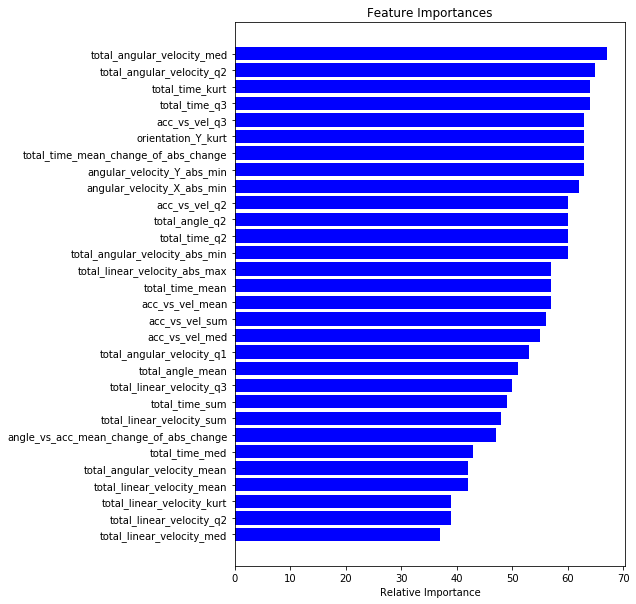

[1]	valid_0's multi_logloss: 1.76888
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's multi_logloss: 1.60048
[3]	valid_0's multi_logloss: 1.47689
[4]	valid_0's multi_logloss: 1.37188
[5]	valid_0's multi_logloss: 1.27283
[6]	valid_0's multi_logloss: 1.1981
[7]	valid_0's multi_logloss: 1.12507
[8]	valid_0's multi_logloss: 1.0582
[9]	valid_0's multi_logloss: 1.00126
[10]	valid_0's multi_logloss: 0.946887
[11]	valid_0's multi_logloss: 0.898368
[12]	valid_0's multi_logloss: 0.85485
[13]	valid_0's multi_logloss: 0.814328
[14]	valid_0's multi_logloss: 0.778795
[15]	valid_0's multi_logloss: 0.746885
[16]	valid_0's multi_logloss: 0.716904
[17]	valid_0's multi_logloss: 0.68856
[18]	valid_0's multi_logloss: 0.663645
[19]	valid_0's multi_logloss: 0.639575
[20]	valid_0's multi_logloss: 0.61772
[21]	valid_0's multi_logloss: 0.59773
[22]	valid_0's multi_logloss: 0.578134
[23]	valid_0's multi_logloss: 0.561677
[24]	valid_0's multi_logloss: 0.543622
[25]	valid_0's multi_logl

[211]	valid_0's multi_logloss: 0.260625
[212]	valid_0's multi_logloss: 0.26203
[213]	valid_0's multi_logloss: 0.262987
[214]	valid_0's multi_logloss: 0.263119
[215]	valid_0's multi_logloss: 0.264192
[216]	valid_0's multi_logloss: 0.264731
[217]	valid_0's multi_logloss: 0.264602
[218]	valid_0's multi_logloss: 0.265292
[219]	valid_0's multi_logloss: 0.265376
[220]	valid_0's multi_logloss: 0.265572
[221]	valid_0's multi_logloss: 0.266013
[222]	valid_0's multi_logloss: 0.266534
[223]	valid_0's multi_logloss: 0.26687
[224]	valid_0's multi_logloss: 0.26691
[225]	valid_0's multi_logloss: 0.267347
[226]	valid_0's multi_logloss: 0.268053
[227]	valid_0's multi_logloss: 0.267802
[228]	valid_0's multi_logloss: 0.267376
[229]	valid_0's multi_logloss: 0.267904
[230]	valid_0's multi_logloss: 0.26814
[231]	valid_0's multi_logloss: 0.268693
[232]	valid_0's multi_logloss: 0.269056
[233]	valid_0's multi_logloss: 0.269917
[234]	valid_0's multi_logloss: 0.269663
[235]	valid_0's multi_logloss: 0.270085
[236

In [225]:
# from sklearn.metrics import accuracy_score

# test_preds = np.zeros((new_test_x.shape[0], 9))
# preds = np.zeros((new_train_x.shape[0]))
# score = 0
# imp_indices = []

# imp_test_preds = np.zeros((new_test_x.shape[0], 9))
# imp_preds = np.zeros((new_train_x.shape[0]))
# imp_score = 0

# for i, (train_idx, test_idx) in enumerate(stfolds.split(new_train_x, surface_df)):
#     eval_set = [(new_train_x.iloc[test_idx], surface_df[test_idx])]
    
#     lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, 
#                                    n_estimators=700, subsample_for_bin=60000, objective='multiclass',
#                                    sub_feature=0.1, min_data=20,
#                                    random_state=42, n_jobs=-1, silent=True)
        
#     lgb_model.fit(new_train_x.iloc[train_idx], surface_df[train_idx], eval_set=eval_set,
#             early_stopping_rounds=200, verbose=True)
    
#     preds[test_idx] = lgb_model.predict(new_train_x.iloc[test_idx])
#     test_preds += lgb_model.predict_proba(new_test_x) / stfolds.n_splits
#     score += lgb_model.score(new_train_x.iloc[test_idx], surface_df[test_idx])
#     print(i, ' score: ', lgb_model.score(new_train_x.iloc[test_idx], surface_df[test_idx]))
    
#     importances = lgb_model.feature_importances_
#     indices = np.argsort(importances)
#     imp_indices.append(indices)
#     features = new_train_x.columns

#     hm = 30
#     plt.figure(figsize=(7, 10))
#     plt.title('Feature Importances')
#     plt.barh(range(len(indices[:hm])), importances[indices][:hm], color='b', align='center')
#     plt.yticks(range(len(indices[:hm])), [features[i] for i in indices])
#     plt.xlabel('Relative Importance')
#     plt.show()
    
    
#     imp_features = [features[i] for i in indices[150:]]
#     imp_train_x = new_train_x[imp_features]
#     imp_test_x = new_test_x[imp_features]
    
#     eval_set = [(imp_train_x.iloc[test_idx], surface_df[test_idx])]

#     imp_lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, 
#                                    n_estimators=1000, subsample_for_bin=60000, objective='multiclass',
#                                    sub_feature=0.1, min_data=20,
#                                    random_state=42, n_jobs=-1, silent=True)

#     imp_lgb_model.fit(imp_train_x.iloc[train_idx], surface_df[train_idx], eval_set=eval_set,
#                       early_stopping_rounds=200, verbose=True)

#     imp_preds[test_idx] = imp_lgb_model.predict(imp_train_x.iloc[test_idx])
#     imp_test_preds += imp_lgb_model.predict_proba(imp_test_x) / stfolds.n_splits
#     imp_score += imp_lgb_model.score(imp_train_x.iloc[test_idx], surface_df[test_idx])
#     print(i, ' score: ', imp_lgb_model.score(imp_train_x.iloc[test_idx], surface_df[test_idx]))

# print('Avg Accuracy', score / stfolds.n_splits)
# print('imp Avg Accuracy', imp_score / stfolds.n_splits)

In [217]:
# submit_lgb_df = pd.DataFrame({
#         "series_id": new_test_x.index,
#         "surface": le.inverse_transform(imp_test_preds.argmax(axis=1))
#     })

In [220]:
# submit_lgb_df.surface.value_counts()

concrete                  956
wood                      789
soft_pvc                  724
tiled                     374
soft_tiles                373
fine_concrete             258
hard_tiles_large_space    229
carpet                    108
hard_tiles                  5
Name: surface, dtype: int64

In [221]:
# len(submit_lgb_df)

3816

In [219]:
# submit_lgb_df.to_csv('submit17_lgb.csv',index=False)

In [501]:
#Random Forrest

0  score:  0.902088772845953


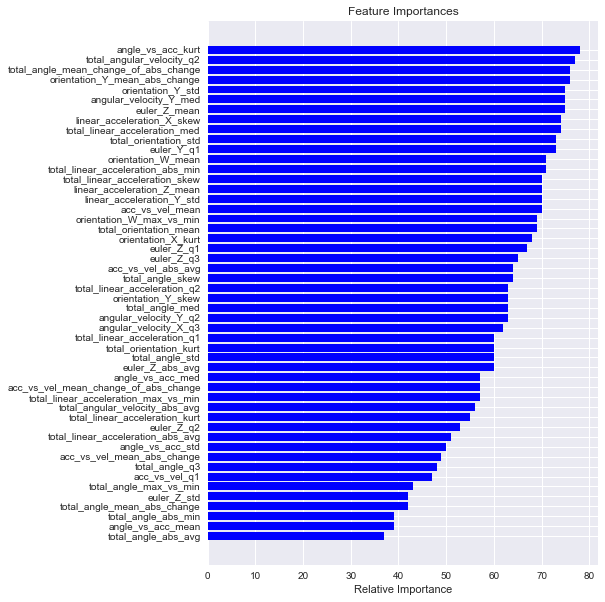

0 feature_selection score:  0.9112271540469974
1  score:  0.9202614379084967


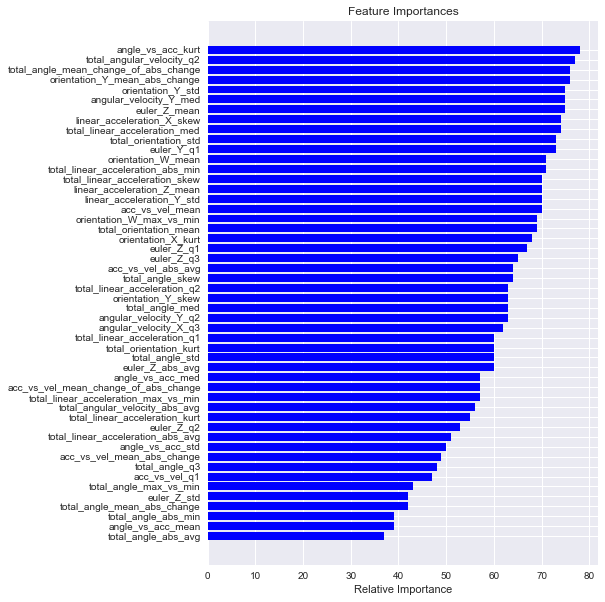

1 feature_selection score:  0.9241830065359478
2  score:  0.910761154855643


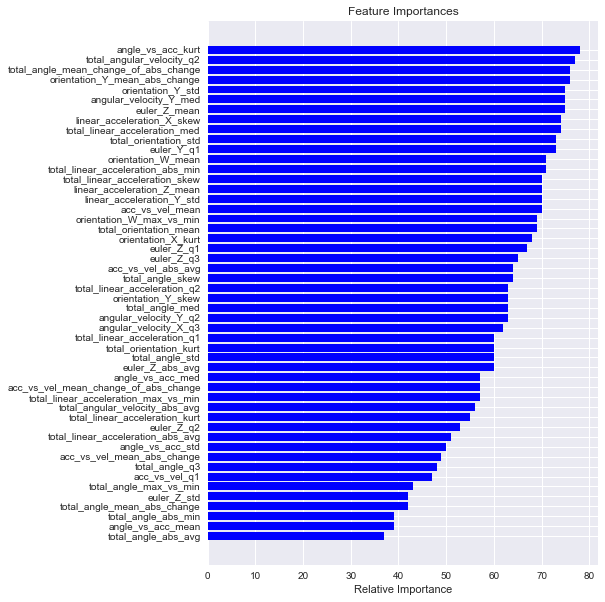

2 feature_selection score:  0.9094488188976378
3  score:  0.9144736842105263


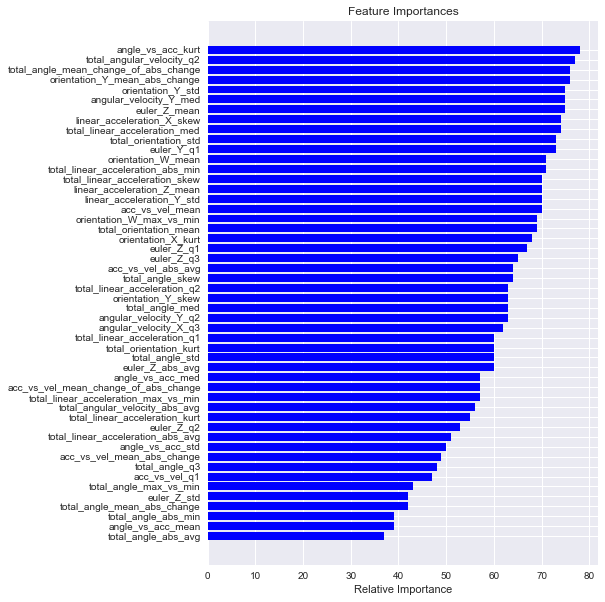

3 feature_selection score:  0.9157894736842105
4  score:  0.9154557463672391


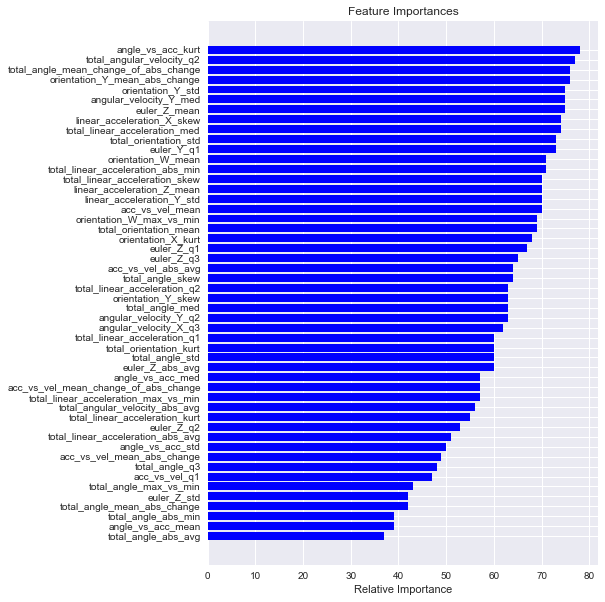

4 feature_selection score:  0.9207397622192867
Avg Accuracy 0.9126081592375715
imp Avg Accuracy 0.9162776430768161


In [544]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

features = new_train_x.columns.tolist()
stfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)
sub_preds = np.zeros((new_test_x.shape[0], 9))
oof_preds = np.zeros((new_train_x.shape[0]))
score=0
imp_test_preds = np.zeros((new_test_x.shape[0], 9))
imp_preds = np.zeros((new_train_x.shape[0]))
imp_score = 0

for i, (train_idx, test_idx) in enumerate(stfolds.split(new_train_x, surface_df)):
    clf =  RandomForestClassifier(n_estimators = 200, bootstrap=False, n_jobs = -1, random_state=42)
    clf.fit(new_train_x.iloc[train_idx], surface_df[train_idx])

    oof_preds[test_idx] = clf.predict(new_train_x.iloc[test_idx])
    sub_preds += clf.predict_proba(new_test_x) / stfolds.n_splits
    score += clf.score(new_train_x.iloc[test_idx], surface_df[test_idx])
    print(i, ' score: ', clf.score(new_train_x.iloc[test_idx], surface_df[test_idx]))

    hm = 50
    plt.figure(figsize=(7, 10))
    plt.title('Feature Importances')
    plt.barh(range(len(indices[:hm])), importances[indices][:hm], color='b', align='center')
    plt.yticks(range(len(indices[:hm])), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

    imp_features = [features[i] for i in indices[5:]]
    imp_train_x = new_train_x[imp_features]
    imp_test_x = new_test_x[imp_features]

    imp_clf = RandomForestClassifier(n_estimators = 200, bootstrap=False, n_jobs = -1, random_state=42)

    imp_clf.fit(imp_train_x.iloc[train_idx], surface_df[train_idx])

    imp_preds[test_idx] = imp_clf.predict(imp_train_x.iloc[test_idx])
    imp_test_preds += imp_clf.predict_proba(imp_test_x) / stfolds.n_splits
    imp_score += imp_clf.score(imp_train_x.iloc[test_idx], surface_df[test_idx])
    print(i, 'feature_selection score: ', imp_clf.score(imp_train_x.iloc[test_idx], surface_df[test_idx]))
    
print('Avg Accuracy', score / stfolds.n_splits)
print('imp Avg Accuracy', imp_score / stfolds.n_splits)

In [532]:
print('Avg Accuracy', score / stfolds.n_splits)
print('imp Avg Accuracy', imp_score / stfolds.n_splits)

Avg Accuracy 0.9126081592375715
imp Avg Accuracy 0.9149731348721548


In [545]:
submit_rf_df = pd.DataFrame({
        "series_id": new_test_x.index,
        "surface": le.inverse_transform(imp_test_preds.argmax(axis=1))
    })

In [546]:
submit_rf_df.head(10)

,series_id,surface
0,0,hard_tiles_large_space
1,1,concrete
2,2,tiled
3,3,carpet
4,4,soft_tiles
5,5,concrete
6,6,soft_pvc
7,7,concrete
8,8,wood
9,9,wood


In [339]:
another_df = pd.read_csv('submit16_lgb.csv')
another_df.surface.value_counts()

concrete                  880
wood                      724
soft_pvc                  663
soft_tiles                440
tiled                     322
fine_concrete             322
hard_tiles_large_space    302
carpet                    162
hard_tiles                  1
Name: surface, dtype: int64

In [61]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[200], 'max_features':[20], 'bootstrap':[False]}

gridclf = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)
gridclf.fit(new_train_x, surface_df)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200], 'max_features': [15, 20, 25], 'bootstrap': [False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
gridclf.best_params_

{'bootstrap': False, 'max_features': 20, 'n_estimators': 200}